# Trabajo Práctico N2 Fernando Martinez

# Aclaración Inicial
En el trabajo 1, como parte de la limpieza del dataset, yo realicé algunas cosas que ahora veo son parte del TP2, por ejemplo codificación de algunas variables, y demás. Por esto decido comenzar el TP2 con el dataset sin limpiar (no como continuación del TP1). Lo único que voy a traer el TP1, es la imputación de nulos, y comenzar con el proceso de análisis que se pide para este TP

## 1. Carga del dataset

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [326]:
# leer datos de un archivo CSV
df = pd.read_csv('enriched_employee_dataset.csv')

In [327]:
# Visualizar datos
df.head(4)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [329]:
print("\nNulls in entire dataset:")
print(df.isnull().sum())


Nulls in entire dataset:
Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


Como burn rate es la variable objetivo, se decide eliminar todos los nulos del target antes de dividirlo.

In [330]:
# eliminar columnas innecesarias
df.drop(columns=['Employee ID'], inplace=True)
# Date of joining y years in company dan la misma información
df.drop(columns=['Date of Joining'], inplace=True)

In [331]:
df = df.dropna(subset=["Burn Rate"])

In [332]:
print(df.isna().sum())

Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1278
Mental Fatigue Score       1945
Burn Rate                     0
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


## Split train y test
Se decide dividir en datos de entrenamiento y test antes de transformar,  para evitar data leakage. Es decir, para evitar que el modelo aprenda de los datos de tests.


In [333]:
# Separar en features (X) y target (Burn Rate)
X = df.drop(columns=["Burn Rate"])
y = df["Burn Rate"]

# Split train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Se imputan las columnas con datos nulos utilizando la mediana
No se incluye burn rate aqui, ya que al entrenarlo para eliminar los nulos, se estaria introduciendo data leackage.

In [334]:
X_train_raw = X_train.copy()
train_df = X_train.copy()
test_df = X_test.copy()

for col in ['Resource Allocation', 'Mental Fatigue Score']:
    mediana = train_df[col].median()
    train_df[col] = train_df[col].fillna(mediana)
    test_df[col] = test_df[col].fillna(mediana)

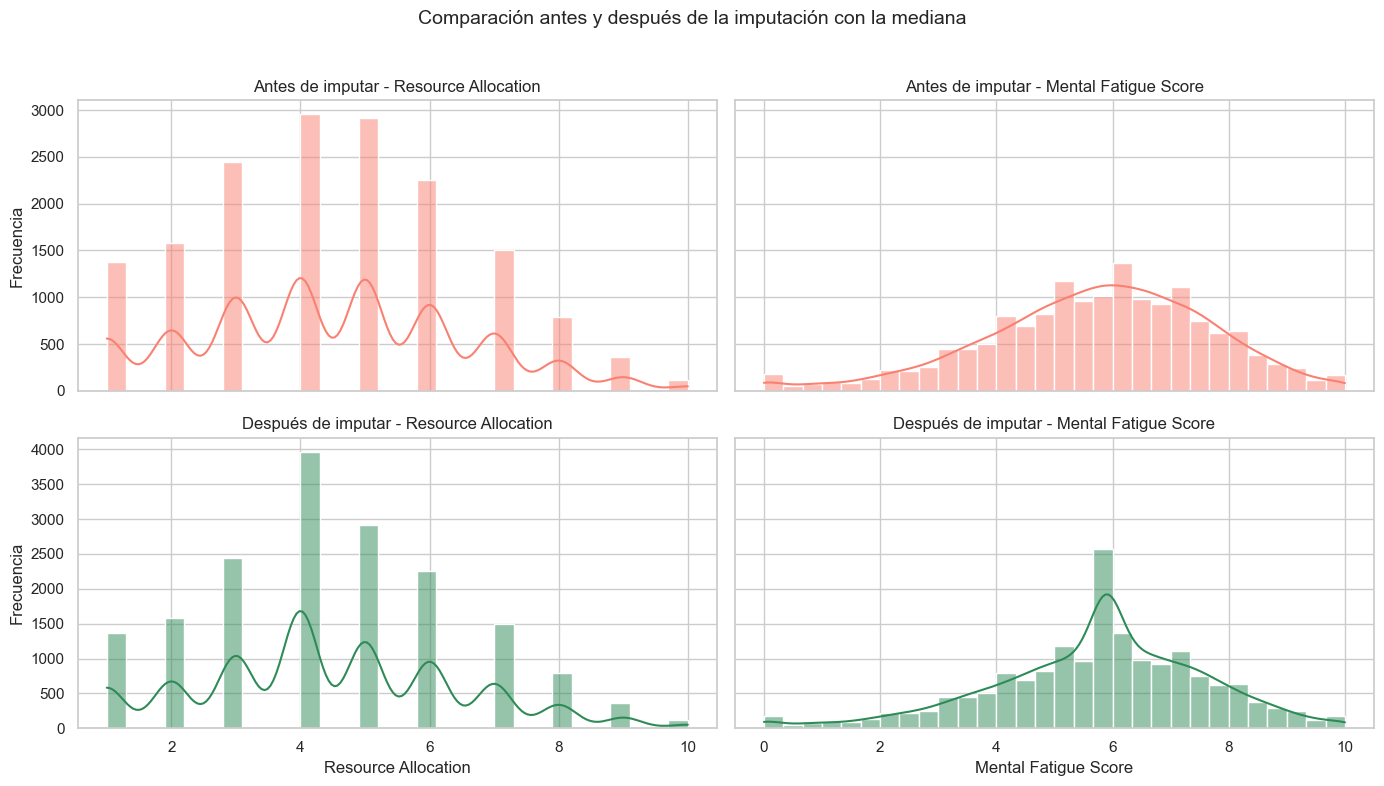

In [335]:
# Gráficos comparativos antes/después de imputar
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex='col', sharey='row')

# Resource Allocation
sns.histplot(X_train_raw["Resource Allocation"], bins=30, ax=axes[0, 0], kde=True, color='salmon')
axes[0, 0].set_title("Antes de imputar - Resource Allocation")
axes[0, 0].set_ylabel("Frecuencia")

sns.histplot(train_df["Resource Allocation"], bins=30, ax=axes[1, 0], kde=True, color='seagreen')
axes[1, 0].set_title("Después de imputar - Resource Allocation")
axes[1, 0].set_xlabel("Resource Allocation")
axes[1, 0].set_ylabel("Frecuencia")

# Mental Fatigue Score
sns.histplot(X_train_raw["Mental Fatigue Score"], bins=30, ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title("Antes de imputar - Mental Fatigue Score")

sns.histplot(train_df["Mental Fatigue Score"], bins=30, ax=axes[1, 1], kde=True, color='seagreen')
axes[1, 1].set_title("Después de imputar - Mental Fatigue Score")
axes[1, 1].set_xlabel("Mental Fatigue Score")

plt.suptitle("Comparación antes y después de la imputación con la mediana", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Codificación de variables

La conversión de la variable continua "Burn Rate" en categorías ("Low", "Medium", "High") permite que el modelo haga una clasificación en lugar de una regresión. Esto hace que los resultados sean más fáciles de interpretar y comunicar, ya que las categorías son simples y claras para cualquier stakeholder o usuario final. Además, clasificar en grupos ayuda a identificar claramente quiénes están en mayor riesgo y a diseñar estrategias más focalizadas para intervenir. En definitiva, esta discretización hace que las predicciones sean más gráficas, fáciles de entender y útiles para tomar decisiones prácticas

In [336]:
from sklearn.preprocessing import OrdinalEncoder
def clasificar_burn_rate(x):
    if x < 0.33:
        return "Low"
    elif x < 0.66:
        return "Medium"
    else:
        return "High"

y_train_class = y_train.apply(clasificar_burn_rate)
y_test_class  = y_test.apply(clasificar_burn_rate)

ordinal_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
y_train_encoded = pd.Series(
    ordinal_encoder.fit_transform(y_train_class.to_frame()).ravel(),
    name="BurnRate_Class",
    index=y_train_class.index  # conserva el index original
)
y_test_encoded  = pd.Series(
    ordinal_encoder.transform(y_train_class.to_frame()).ravel(),
    name="BurnRate_Class",
    index=y_train_class.index  # conserva el index original
)


Como los modelos numéricos no pueden trabajar directamente con variables categoricas como strings, como Male, 
Yes, No, etc. es necesario transformarlas en numéricas y que conserven la información de la categoria, sin introducir sesgos o relaciones incorrectas.
Porque One Hot Encoding? Porque las variables categóricas son nominales, es decir no tienen un orden lógico, y tienen baja cardinalidad (yes/no, Male/Female, Service/Product). Se crea una columna binaria por categoría. 
Se utiliza dropfirst para evitar la colinealidad, es decir, se codifica Gender, solo como Male o female, ya que la otra variable es implicita, y tienen una correlación total entre ellas.

In [337]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definimos las columnas categóricas y numéricas
categorical_cols = ["Gender", "Company Type", "WFH Setup Available"]
numeric_cols = [col for col in train_df.columns if col not in categorical_cols]
X_train_num_df = train_df[numeric_cols].copy()
X_test_num_df  = test_df[numeric_cols].copy()

# Codificación One-Hot para categóricas 
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(train_df[categorical_cols])
X_test_ohe  = ohe.transform(test_df[categorical_cols])
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Convertimos las variables codificadas a DataFrames
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=train_df.index)
X_test_ohe_df  = pd.DataFrame(X_test_ohe,  columns=ohe_feature_names, index=test_df.index)

X_train_full = pd.concat([X_train_num_df, X_train_ohe_df], axis=1)
X_test_full  = pd.concat([X_test_num_df,  X_test_ohe_df],  axis=1)

In [300]:
X_train_full.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Gender_Male,Company Type_Service,WFH Setup Available_Yes
count,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000
mean,2.177977,4.453410,5.744607,16.016416,47.752139,6.114792,2.523179,2.816185,3.473584,11.051098,1.734509,0.477977,0.653873,0.540173
std,1.139575,1.993855,1.842219,0.127073,7.605622,0.887335,1.389757,1.271044,1.392525,4.913041,1.696110,0.499529,0.475748,0.498398
min,0.000000,1.000000,0.000000,16.000000,35.000000,3.700000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.700000,16.000000,41.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,5.900000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000,0.000000,1.000000,1.000000
75%,3.000000,6.000000,6.900000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000,1.000000,1.000000,1.000000
max,5.000000,10.000000,10.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000,1.000000,1.000000,1.000000


## Normalizacion/estandarizacion

Obtener los máximos y mínimos permite verificar si hay variables con valores muy dispares en el dataset

In [338]:
# Obtener los máximos de cada variable
maximos = X_train_full.max()

# Obtener los mínimos de cada variable
minimos = X_train_full.min()

# Mostrar los resultados
print("Máximos de cada variable:\n", maximos)
print("\nMínimos de cada variable:\n", minimos)

Máximos de cada variable:
 Designation                 5.0
Resource Allocation        10.0
Mental Fatigue Score       10.0
Years in Company           17.0
Work Hours per Week        59.0
Sleep Hours                 9.1
Work-Life Balance Score     5.0
Manager Support Score       5.0
Deadline Pressure Score     5.0
Team Size                  19.0
Recognition Frequency       5.0
Gender_Male                 1.0
Company Type_Service        1.0
WFH Setup Available_Yes     1.0
dtype: float64

Mínimos de cada variable:
 Designation                 0.0
Resource Allocation         1.0
Mental Fatigue Score        0.0
Years in Company           16.0
Work Hours per Week        35.0
Sleep Hours                 3.7
Work-Life Balance Score     1.0
Manager Support Score       1.0
Deadline Pressure Score     1.0
Team Size                   3.0
Recognition Frequency       0.0
Gender_Male                 0.0
Company Type_Service        0.0
WFH Setup Available_Yes     0.0
dtype: float64


Se observa que algunas variables como resource allocation, work hours peer week, mental fatigue score, team size, y sleep hours presentan una gran amplitud entre sus valores mínimos y máximos, y se encuentran en diferentes escalas. Esta disparidad en las unidades de medida puede afectar negativamente el desempeño de ciertos algoritmos de machine learning, especialmente aquellos sensibles a la escala de los datos

Se analizan ambos escaladores para verificar como se modifican las distribuciones, para poder decidir que método es el más adecuado para el modelo. 

In [339]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Lista de variables a analizar
variables = [
    'Resource Allocation', 'Mental Fatigue Score', 'Work Hours per Week',
    'Sleep Hours', 'Team Size'
]

scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

X_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(train_df[variables]),
    columns=variables,
    index=train_df.index
)

X_std = pd.DataFrame(
    scaler_std.fit_transform(train_df[variables]),
    columns=variables,
    index=train_df.index
)

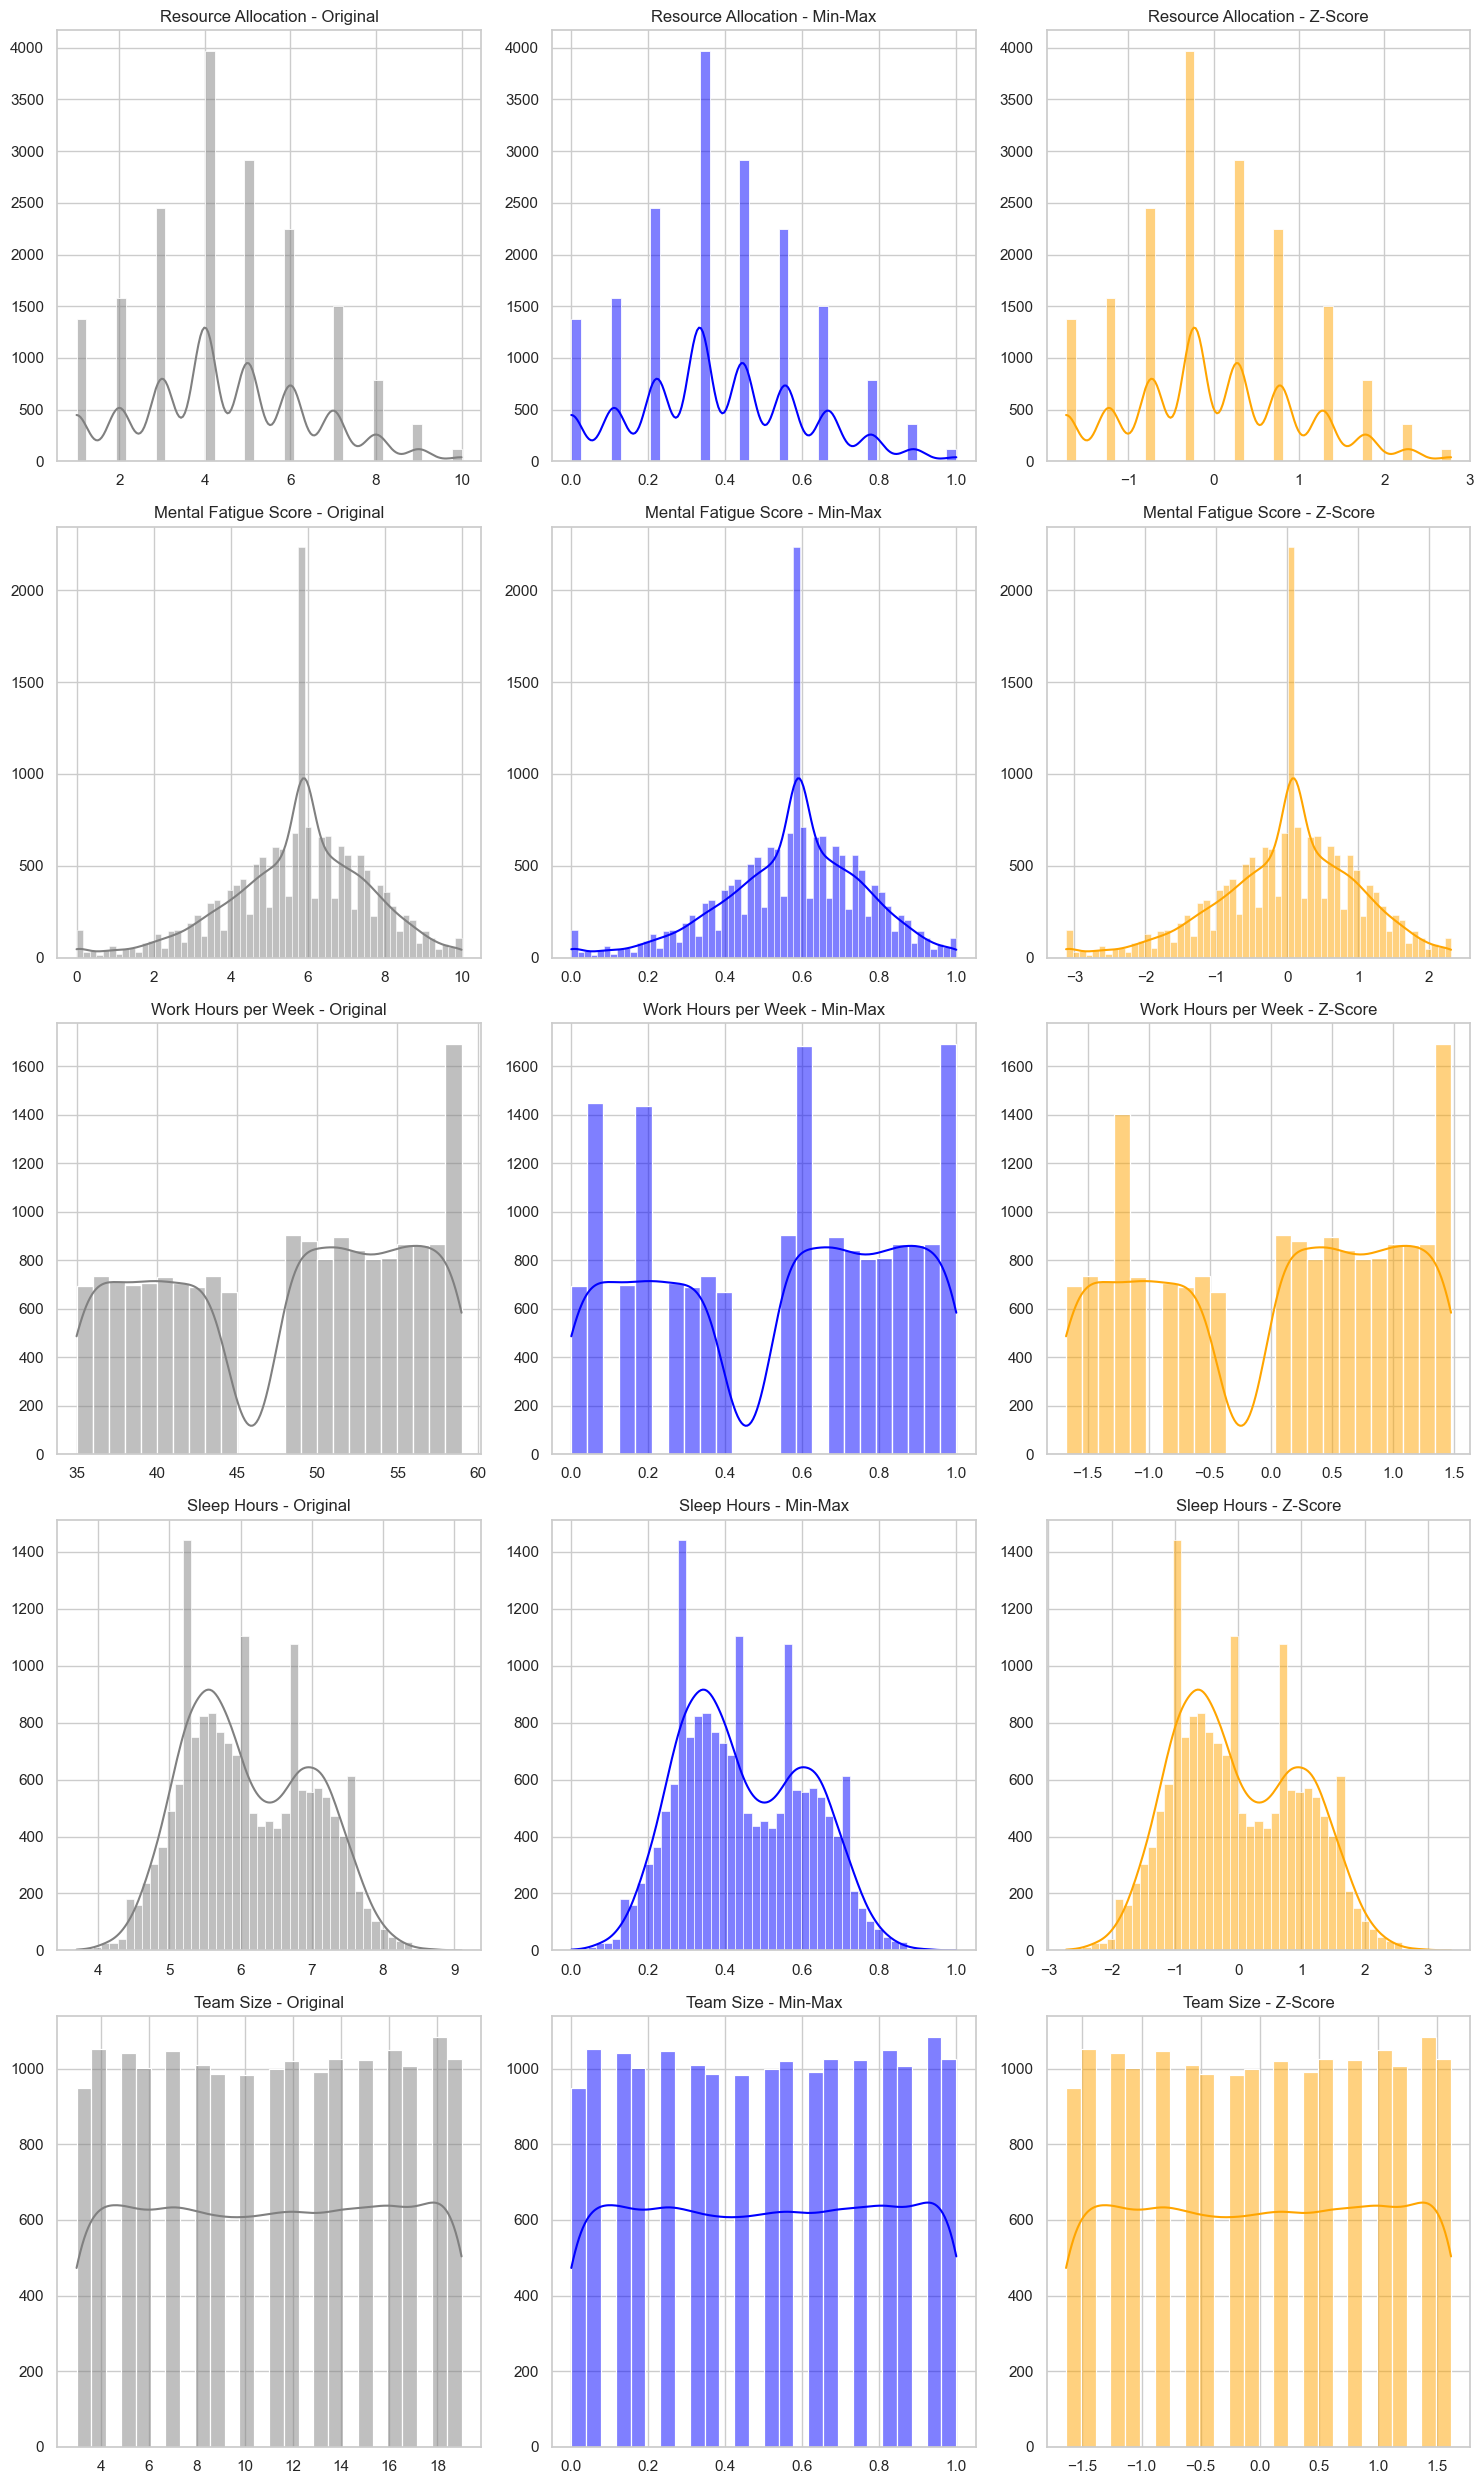

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(original_df, minmax_df, std_df, variables):
    fig, axes = plt.subplots(len(variables), 3, figsize=(15, 5*len(variables)))
    for i, var in enumerate(variables):
        sns.histplot(original_df[var], kde=True, ax=axes[i,0], color='gray')
        axes[i,0].set_title(f'{var} - Original')
        sns.histplot(minmax_df[var], kde=True, ax=axes[i,1], color='blue')
        axes[i,1].set_title(f'{var} - Min-Max')
        sns.histplot(std_df[var], kde=True, ax=axes[i,2], color='orange')
        axes[i,2].set_title(f'{var} - Z-Score')
        for j in range(3):
            axes[i,j].set_xlabel('')
            axes[i,j].set_ylabel('')
    plt.tight_layout()
    plt.show()

plot_distributions(train_df, X_minmax, X_std, variables)

Se graficaron las distribuciones originales y escaladas (MinMax y Z-score) para verificar visualmente que las transformaciones preservan la forma de las variables. Como se esperaba, las distribuciones no se modificaron, ya que los métodos de escalado no afectan la asimetría ni la densidad, sino únicamente la escala numérica. Esto confirma que el preprocesamiento fue aplicado correctamente y que no se introdujeron distorsiones en las variables numérica

Se realizan los tests de Shapiro-Wilk y Kolmogorov-Smirnov para verificar si las variables siguen una distribución normal o no

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest
import pandas as pd
# Lista de variables a analizar
variables = [
    'Resource Allocation', 'Mental Fatigue Score', 'Work Hours per Week',
    'Sleep Hours', 'Team Size'
]

for var in variables:
    print(f"\nVariable: {var}")

    # Estadísticos descriptivos
    print(X_train_full[var].describe())

    # Prueba de normalidad Shapiro-Wilk
    stat, p_value = shapiro(X_train_full[var])
    print(f"Shapiro-Wilk p-valor: {p_value:.4f} {'(Normal)' if p_value > 0.05 else '(No normal)'}")
    
    # Prueba de Kolmogorov-Smirnov contra la normal
    ks_stat, ks_p_value = kstest(X_train_full[var], 'norm', args=(X_train_full[var].mean(), X_train_full[var].std()))
    print(f"Kolmogorov-Smirnov p-valor: {ks_p_value:.4f} {'(Normal)' if ks_p_value > 0.05 else '(No normal)'}")



Variable: Resource Allocation
count    17300.000000
mean         4.453410
std          1.993855
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: Resource Allocation, dtype: float64
Shapiro-Wilk p-valor: 0.0000 (No normal)
Kolmogorov-Smirnov p-valor: 0.0000 (No normal)

Variable: Mental Fatigue Score
count    17300.000000
mean         5.744607
std          1.842219
min          0.000000
25%          4.700000
50%          5.900000
75%          6.900000
max         10.000000
Name: Mental Fatigue Score, dtype: float64
Shapiro-Wilk p-valor: 0.0000 (No normal)
Kolmogorov-Smirnov p-valor: 0.0000 (No normal)

Variable: Work Hours per Week
count    17300.000000
mean        47.752139
std          7.605622
min         35.000000
25%         41.000000
50%         49.000000
75%         54.000000
max         59.000000
Name: Work Hours per Week, dtype: float64
Shapiro-Wilk p-valor: 0.0000 (No normal)
Kolmogorov-Smirnov p-valor: 0.0000

c:\Users\fg_ma\AppData\Local\pypoetry\Cache\virtualenvs\analisis-de-datos-0r5QLJ9s-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17300.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\fg_ma\AppData\Local\pypoetry\Cache\virtualenvs\analisis-de-datos-0r5QLJ9s-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17300.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\fg_ma\AppData\Local\pypoetry\Cache\virtualenvs\analisis-de-datos-0r5QLJ9s-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17300.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\fg_ma\AppData\Local\pypoetry\Cache\virtualenvs\analisis-de-datos-0r5QLJ9s-py3.11\Lib\site-packages\scipy\stat

Se observa que las variables no siguen una distribución normal. De acuerdo a la teoría, el método de MinMaxScaler es el más adecuado ya que el método de Z-score sugiere o recomienda que las variables sigan una distribución normal. 

In [ ]:
# aplicar el Escalado Min-Max a las variables numéricas
variables = [
    'Resource Allocation', 'Mental Fatigue Score', 'Work Hours per Week',
    'Sleep Hours', 'Team Size'
]

X_train_scaled = X_train_full.copy()
X_test_scaled  = X_test_full.copy()

# 3. Creamos el escalador
scaler = MinMaxScaler()

# 4. Ajustamos sobre el train y transformamos train y test
X_train_scaled[variables] = scaler.fit_transform(X_train_scaled[variables])
X_test_scaled[variables]  = scaler.transform(X_test_scaled[variables])

## Selección de Features

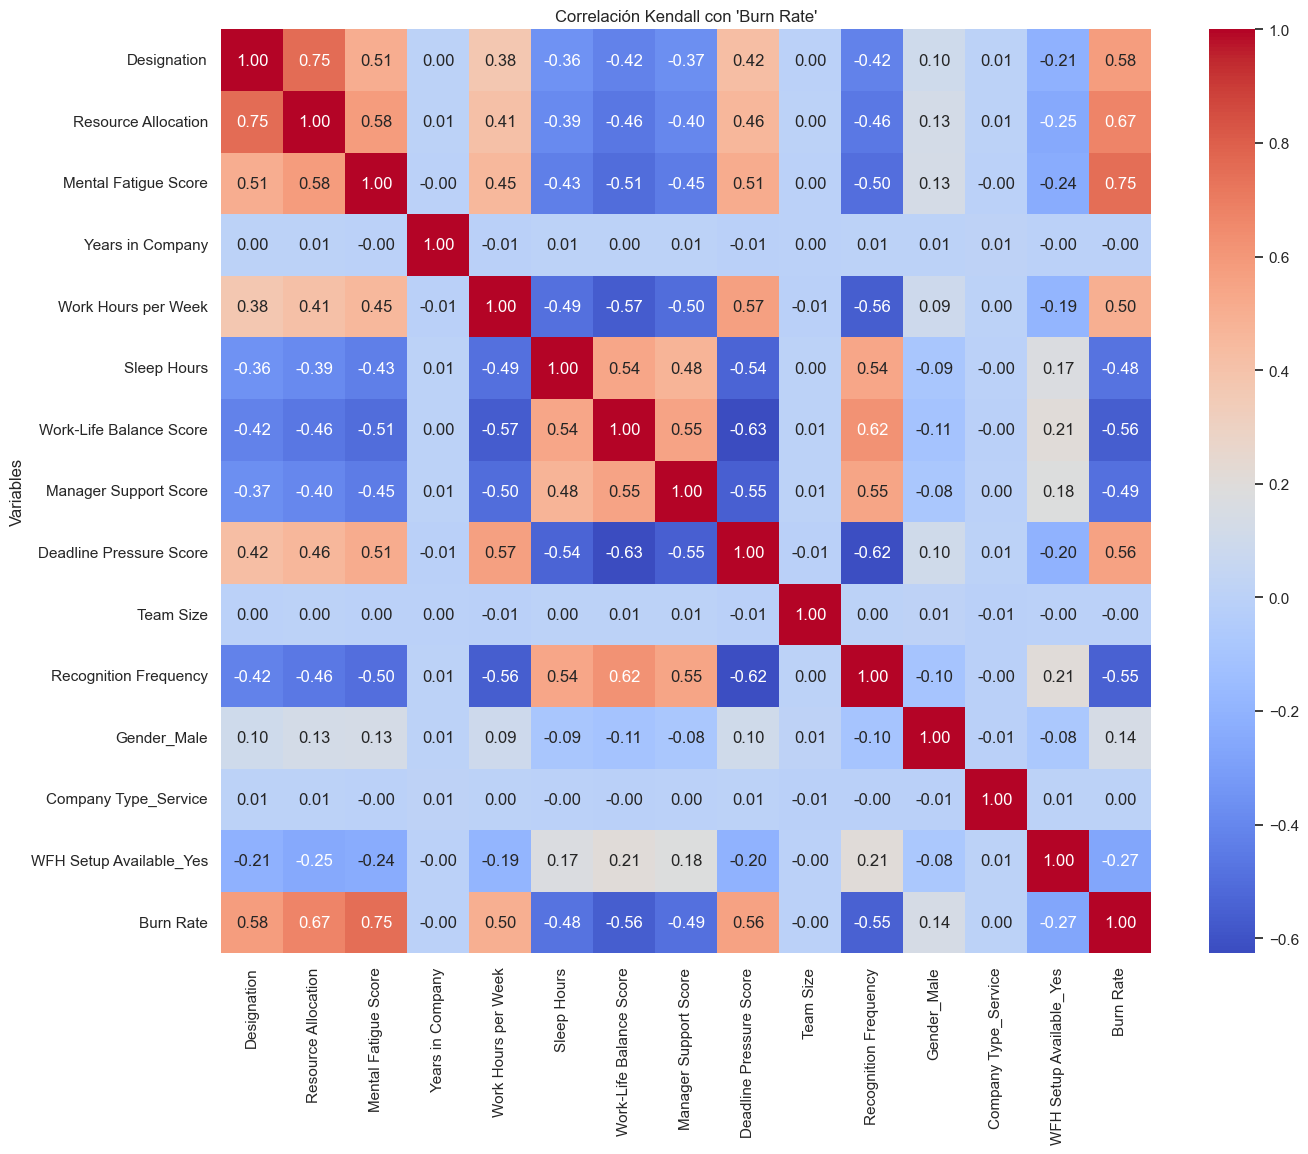

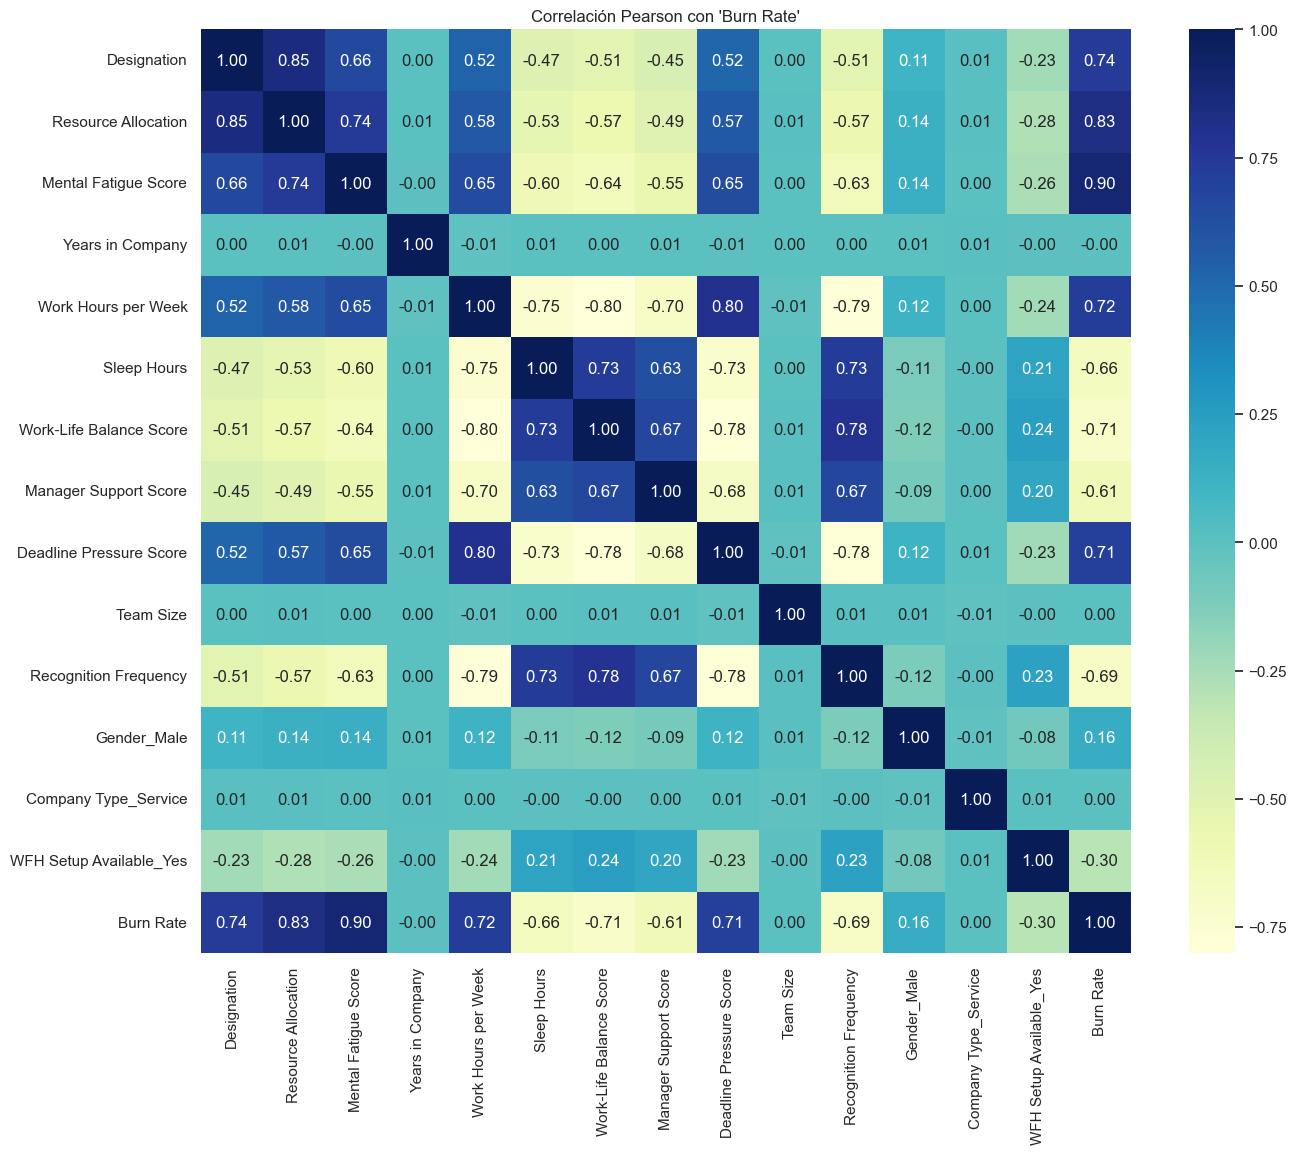

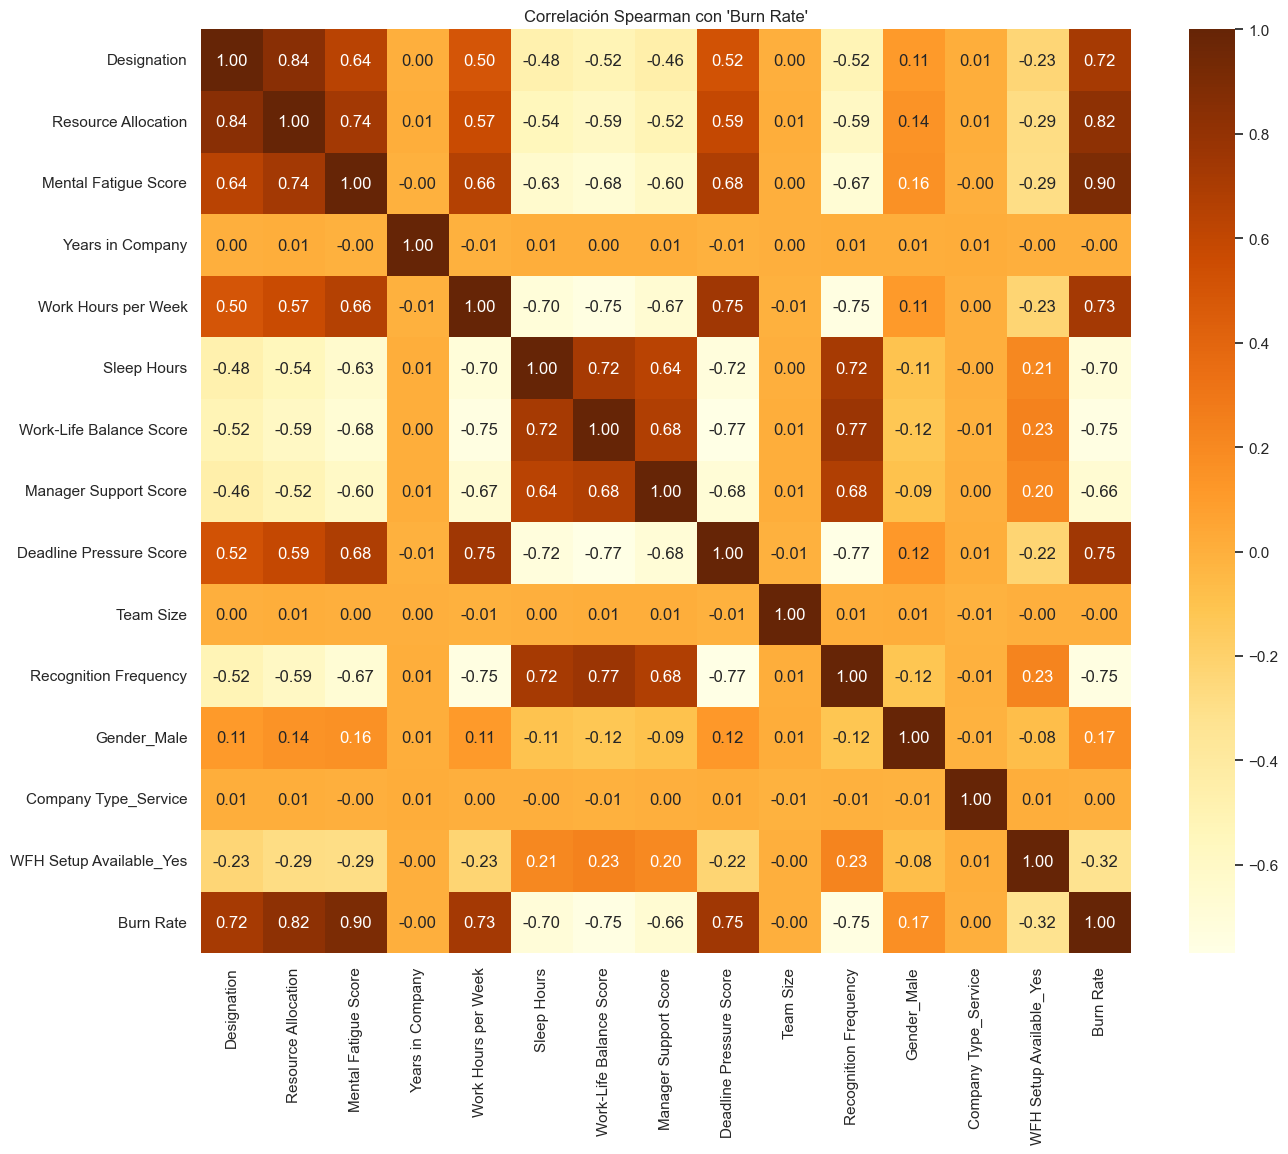

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear nuevo DataFrame con 'Burn Rate' incluida
X_corr_df = X_train_scaled.copy()
X_corr_df["Burn Rate"] = y_train.values

# Correlación Kendall
plt.figure(figsize=(15, 12))
sns.heatmap(X_corr_df.corr(method='kendall'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlación Kendall con 'Burn Rate'")
plt.ylabel('Variables')
plt.show()

# Correlación Pearson
plt.figure(figsize=(15, 12))
sns.heatmap(X_corr_df.corr(method='pearson'), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Correlación Pearson con 'Burn Rate'")
plt.show()

# Correlación Spearman
plt.figure(figsize=(15, 12))
sns.heatmap(X_corr_df.corr(method='spearman'), annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("Correlación Spearman con 'Burn Rate'")
plt.show()


 Umbral de varianza (para descartar columnas sin información)

 Se aplica la técnica de selección por varianza (VarianceThreshold) con un umbral de 0.02 para eliminar aquellas variables que presentan muy poca variabilidad en sus valores a lo largo del conjunto de entrenamiento (X_train_full).

In [344]:
from sklearn.feature_selection import VarianceThreshold

selector_var = VarianceThreshold(threshold=0.02)
X_train_var = selector_var.fit_transform(X_train_scaled)
selected_vars = X_train_scaled.columns[selector_var.get_support()]

print("Features con varianza suficiente (>0.02):")
print(selected_vars.tolist())

# También aplicamos al test
X_test_var = selector_var.transform(X_test_scaled)


Features con varianza suficiente (>0.02):
['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score', 'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency', 'Gender_Male', 'Company Type_Service', 'WFH Setup Available_Yes']


Anova
Compara las medias de una variable numérica entre distintas categorías de la variable objetivo (en este caso, las clases de burnout).

Se aplica cuando la variable dependiente es categórica (como el BurnRate_Class) y las variables explicativas son numéricas.

Nos da un F-score que indica qué tan bien separa esa feature a las clases: cuanto mayor el score, más relevante la feature.

In [345]:
print(y_train_encoded.isna().sum())

0


In [346]:
from sklearn.feature_selection import SelectKBest, f_classif

X_train_num = X_train_scaled[[
    'Designation', 'Resource Allocation', 'Mental Fatigue Score',
    'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score',
    'Manager Support Score', 'Deadline Pressure Score', 'Team Size',
    'Recognition Frequency', 'Years in Company'
]]

selector_anova = SelectKBest(score_func=f_classif, k='all')
X_train_num_best = selector_anova.fit_transform(X_train_num, y_train_encoded)

selected_indices = selector_anova.get_support()
selected_features = X_train_num.columns[selected_indices]
scores = selector_anova.scores_[selected_indices]

print("\nCaracterísticas seleccionadas (ANOVA):")
for feature, score in zip(selected_features, scores):
    print(f"{feature}: {score:.4f}")

# Aplicar filtro a test
X_test_num = X_test_scaled[selected_features]
X_test_num_best = selector_anova.transform(X_test_num)


Características seleccionadas (ANOVA):
Designation: 6720.7289
Resource Allocation: 11182.5799
Mental Fatigue Score: 15435.1476
Work Hours per Week: 7127.9670
Sleep Hours: 5209.9718
Work-Life Balance Score: 6558.1782
Manager Support Score: 4140.6255
Deadline Pressure Score: 6621.5890
Team Size: 0.3025
Recognition Frequency: 6218.9873
Years in Company: 0.6576


Las variables con mayor puntuación ANOVA son:

Mental Fatigue Score (15.435): la más fuertemente asociada al nivel de burnout.

Resource Allocation (11.183): reflejaría cómo la asignación de recursos influye en el desgaste del empleado.

Work Hours per Week (7.128) y Designation (6.721): también presentan una alta capacidad predictiva.

Otras variables con scores altos incluyen:

Deadline Pressure Score, Work-Life Balance Score, Recognition Frequency, Manager Support Score, y Sleep Hours, todas con puntajes superiores a 4.000.

Estas variables deben considerarse fuertes candidatas para ser incluidas en el modelo de clasificación final.

Variables poco relevantes
Por otro lado:

Team Size (0.30) y Years in Company (0.65) tienen muy baja puntuación ANOVA, lo que sugiere que no aportan información relevante para discriminar entre las clases del target. Podrían ser descartadas en una etapa de reducción de dimensionalidad o como parte de un proceso de simplificación del modelo

## Extracción de features

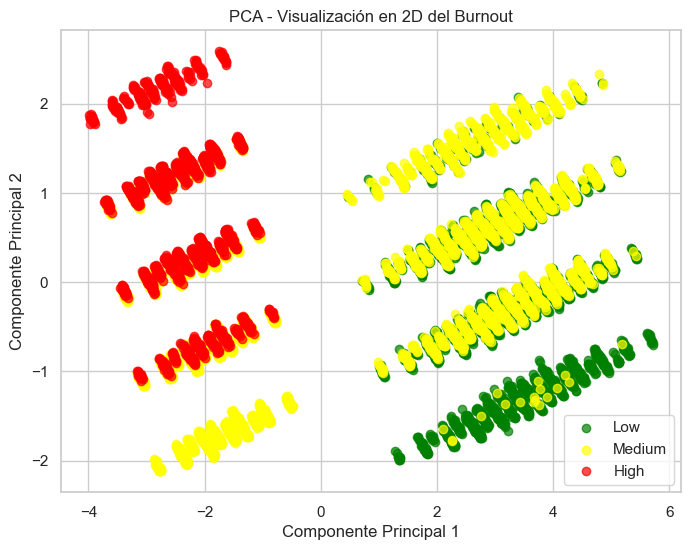

Varianza explicada: [0.68721212 0.0802619 ]
Varianza acumulada: [0.68721212 0.76747403]


In [350]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Definimos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# 2. Visualización en 2D por clase
plt.figure(figsize=(8, 6))

# target_names en este caso: 0 = Low, 1 = Medium, 2 = High
target_names = ['Low', 'Medium', 'High']
colors = ['green', 'yellow', 'red']

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_train_pca[y_train_encoded == i, 0],
        X_train_pca[y_train_encoded == i, 1],
        label=target_name,
        alpha=0.7,
        c=colors[i]
    )

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Visualización en 2D del Burnout")
plt.legend()
plt.grid(True)
plt.show()

# Porcentaje de varianza explicada por cada componente
print("Varianza explicada:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.cumsum())


Se aplica el Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad del conjunto de entrenamiento y facilitar la visualización de las clases de Burnout (Low, Medium, High) en un espacio bidimensional.

Los dos primeros componentes principales explicaron conjuntamente el 76.7% de la varianza total del dataset, lo cual representa una proporción significativa de la información original.

Esta reducción permite observar la estructura subyacente de los datos y posibles agrupamientos entre clases. No obstante, dado que aún queda un 23.3% de varianza sin representar, se reconoce que esta visualización es una aproximación, y que para tareas de modelado podría ser conveniente retener más componentes principales

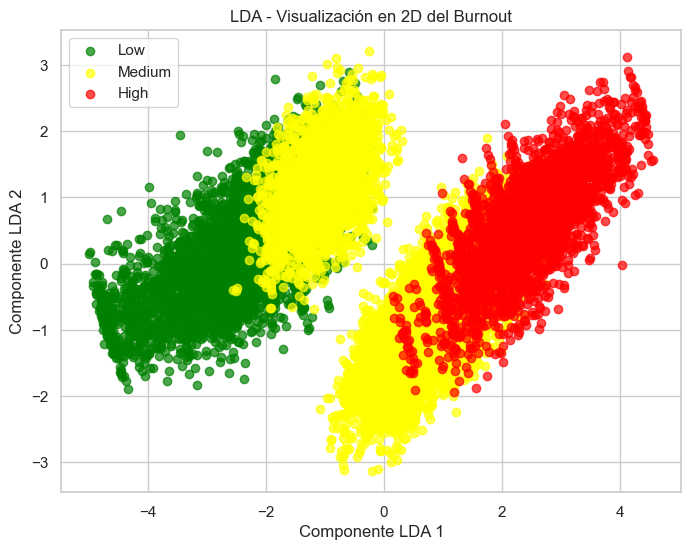

Varianza explicada por LDA: [0.95763223 0.04236777]


In [351]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Asegurarse de que las etiquetas están alineadas con X_train_scaled
y_train_aligned = y_train_encoded.loc[X_train_scaled.index]

# Aplicar LDA con 2 componentes
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train_scaled, y_train_aligned)

# Visualización
plt.figure(figsize=(8, 6))

# Definir nombres de clases y colores
target_names = ['Low', 'Medium', 'High']
colors = ['green', 'yellow', 'red']

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_lda[y_train_aligned == i, 0],
        X_lda[y_train_aligned == i, 1],
        label=target_name,
        alpha=0.7,
        c=colors[i]
    )

plt.xlabel("Componente LDA 1")
plt.ylabel("Componente LDA 2")
plt.title("LDA - Visualización en 2D del Burnout")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por LDA:", lda.explained_variance_ratio_)


Se observa que LDA representa mejor nuestro dataset ya que es supervisado y logra una mayor separación entre clases

Se visualizan los coeficientes de LDA para su posterior análisis. Coeficientes cercanos a 0 en LDA, marcarían posibles candidatos a eliminar. 

In [352]:
coef_lda = pd.DataFrame(lda.coef_, columns=X_train_scaled.columns)
print("Importancia de cada feature en LDA:")
print(coef_lda.T.sort_values(by=0, ascending=False))

Importancia de cada feature en LDA:
                                 0         1          2
Sleep Hours               1.409613 -0.595210  -0.185066
Work-Life Balance Score   0.233440 -0.086710  -0.074567
Recognition Frequency     0.147923 -0.052314  -0.056992
Manager Support Score     0.134114 -0.049345  -0.044583
Gender_Male               0.127776 -0.062661   0.015468
Team Size                -0.014212  0.007264  -0.002812
Years in Company         -0.019958  0.078989  -0.258672
Company Type_Service     -0.036657  0.002796   0.051774
Designation              -0.081282  0.016560   0.076441
WFH Setup Available_Yes  -0.178416  0.120879  -0.145222
Deadline Pressure Score  -0.216507  0.090365   0.032331
Work Hours per Week      -1.267428  0.474186   0.392235
Resource Allocation      -5.314103  0.002236   8.998575
Mental Fatigue Score    -11.877977  1.735300  13.706068


Se analizaron en conjunto los coeficientes LDA y los Scores de ANOVA,  para evaluar descartar las variables que tengan bajos scores en ANOVA y coeficientes cernanos a cero en LDA

##### Variables a mantener sí o sí:

Mental Fatigue Score

Resource Allocation

Work Hours per Week

Sleep Hours

##### Variables con relaciones intermedias

Work-Life Balance Score

Manager Support Score

Recognition Frequency

Designation

#### Variables a eliminar sin mucha pérdida:

Team Size

Years in Company


In [353]:
# Variables a eliminar
vars_a_eliminar = ['Team Size', 'Years in Company']

# Crear nuevos datasets sin esas variables
X_train_final = X_train_scaled.drop(columns=vars_a_eliminar)
X_test_final  = X_test_scaled.drop(columns=vars_a_eliminar)

print("Shape final de X_train:", X_train_final.shape)
print("Shape final de X_test:", X_test_final.shape)


Shape final de X_train: (17300, 12)
Shape final de X_test: (4326, 12)


## Análisis de desbalanceo de clases

Dado que se esta trabajando con un problema de clasificación multiclase, es necesario analizar si las clases están balanceadas, ya que un desbalance significativo, puede llevar a que los modelos favorezcan calses mayoritarias, reduciendo el desempeño.

In [354]:
# Análisis de distribución y entropía de shannon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

def plot_distribution(y, title="Distribución de clases"):
    sns.countplot(x=y, palette="Set2")
    plt.title(title)
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

def class_info(y, title=""):
    print("Proporciones de clases:")
    print(y.value_counts(normalize=True).round(3))
    print("\nEntropía de Shannon:", round(shannon_entropy(y), 3))
    plot_distribution(y, title)


Proporciones de clases:
BurnRate_Class
1.0    0.579
0.0    0.265
2.0    0.156
Name: proportion, dtype: float64

Entropía de Shannon: 1.383


C:\Users\fg_ma\AppData\Local\Temp\ipykernel_20416\3029982103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


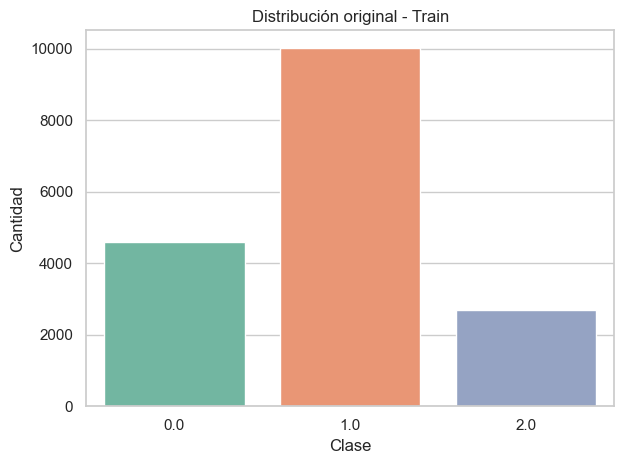

In [355]:
class_info(y_train_encoded, "Distribución original - Train")

Se realizó un análisis de distribución de clases sobre la variable target BurnRate_Class, observándose una proporción de aproximadamente 58% para la clase Medium, 27% para Low y 15% para High.

Para cuantificar el grado de desbalance, se utilizó la entropía de Shannon, obteniéndose un valor de 1.377 sobre un máximo teórico de 1.585 (para 3 clases).
Este valor indica que, si bien existe cierto desbalance, no es un desbalance extremo. De igual forma, se procede a realizar un balanceo, para reducir el riesgo de sesgo hacia la clase Medium. 
Teniendo en cuenta que el dataset tiene un número no tan gigantesco de muestras, se va a utilizar la técnica de oversampling con SMOTE. 

Proporciones de clases:
BurnRate_Class
1.0    0.333
0.0    0.333
2.0    0.333
Name: proportion, dtype: float64

Entropía de Shannon: 1.585


C:\Users\fg_ma\AppData\Local\Temp\ipykernel_20416\3029982103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


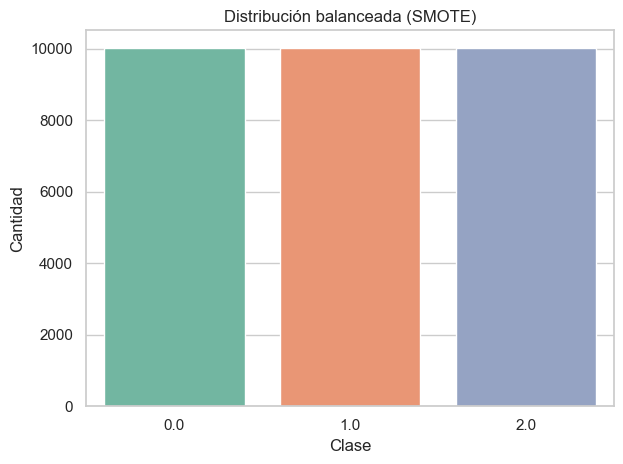

In [356]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Aplicamos SMOTE sobre los datos preprocesados
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train_encoded)

# Convertimos a DataFrames para análisis posterior
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train_scaled.columns)
y_train_sm_df = pd.Series(y_train_sm, name='BurnRate_Class')

# Analizamos la nueva distribución balanceada
class_info(y_train_sm_df, title="Distribución balanceada (SMOTE)")